**Tìm hiểu các mối quan hệ**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('COVID_4-19.csv')
data.head()

,Country,Total Cases,New Cases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent
0,USA,32476153,51653.0,581573,498.0,25043463,6851117,9815.0,97655.0,1749.0,430886619.0,1295672.0,332558517,North America
1,India,15314714,256947.0,180550,1757.0,13103220,2030944,8944.0,11011.0,130.0,267894549.0,192610.0,1390864355,Asia
2,Brazil,13977713,34642.0,375049,1607.0,12460712,1141952,8318.0,65387.0,1754.0,28600000.0,133789.0,213770046,South America
3,France,5296822,7296.0,101222,489.0,4151289,1044311,5970.0,81004.0,1548.0,72613536.0,1110478.0,65389433,Europe
4,Russia,4710690,8589.0,105928,346.0,4333598,271164,2300.0,32268.0,726.0,126000000.0,863104.0,145984714,Europe


In [3]:
data.dtypes

Country              object
Total Cases           int64
New Cases           float64
TotalDeaths          object
NewDeaths           float64
TotalRecovered        int64
ActiveCases           int64
Serious             float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population           object
Continent            object
dtype: object

---
bỏ dòng *MS Zaandam* với *Diamond Princess*

Replace = 0 tất cả ô thiếu

Chuyển total death, Populrtion sang int64




In [4]:
data_ele = data.loc[(data["Country"] == 'MS Zaandam') | (data["Country"] == 'Diamond Princess')]
data = data.drop(data.index[list(data_ele.index)])
data.fillna(0, inplace=True)
data = data.replace(r'^\s*$', 0, regex=True)
data['TotalDeaths'] = data['TotalDeaths'].astype('int64')

In [5]:
ds = ['Total Cases','New Cases','TotalDeaths','NewDeaths','TotalRecovered','ActiveCases','Serious','Tot Cases/1M pop','Deaths/1M pop','Total Tests','Tests/1M pop','Population']
data[ds] = data[ds].astype('int64')

In [6]:
data.dtypes

Country             object
Total Cases          int64
New Cases            int64
TotalDeaths          int64
NewDeaths            int64
TotalRecovered       int64
ActiveCases          int64
Serious              int64
Tot Cases/1M pop     int64
Deaths/1M pop        int64
Total Tests          int64
Tests/1M pop         int64
Population           int64
Continent           object
dtype: object

<AxesSubplot:title={'center':'NEW CASES OF TOP 20 COUNTRY WITH HIGHEST TOTAL CASES'}, ylabel='Country'>

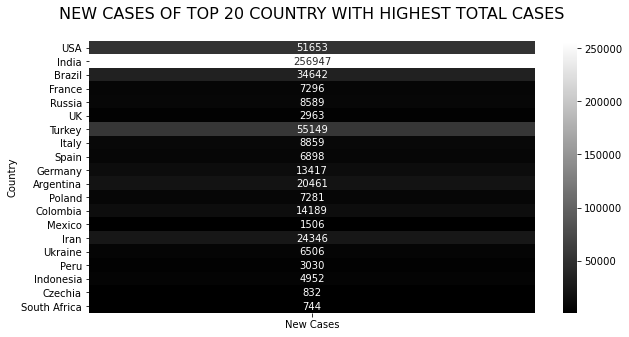

In [7]:
data_newcases = data.head(20)
data_newcases = data_newcases.set_index('Country')
plt.figure(figsize = (10,5))
plt.title('NEW CASES OF TOP 20 COUNTRY WITH HIGHEST TOTAL CASES',y = 1.06,fontsize = '16')
sns.heatmap(data_newcases[['New Cases']],annot=True,cmap = 'gray',fmt='d')


In [8]:
data1 = data[['Country','Total Cases','TotalDeaths']]
data1.head()

,Country,Total Cases,TotalDeaths
0,USA,32476153,581573
1,India,15314714,180550
2,Brazil,13977713,375049
3,France,5296822,101222
4,Russia,4710690,105928


<ipython-input-19-f8196d02bb24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_deaths.sort_values(by = 'TotalDeaths', ascending = False,ignore_index=True, inplace = True)


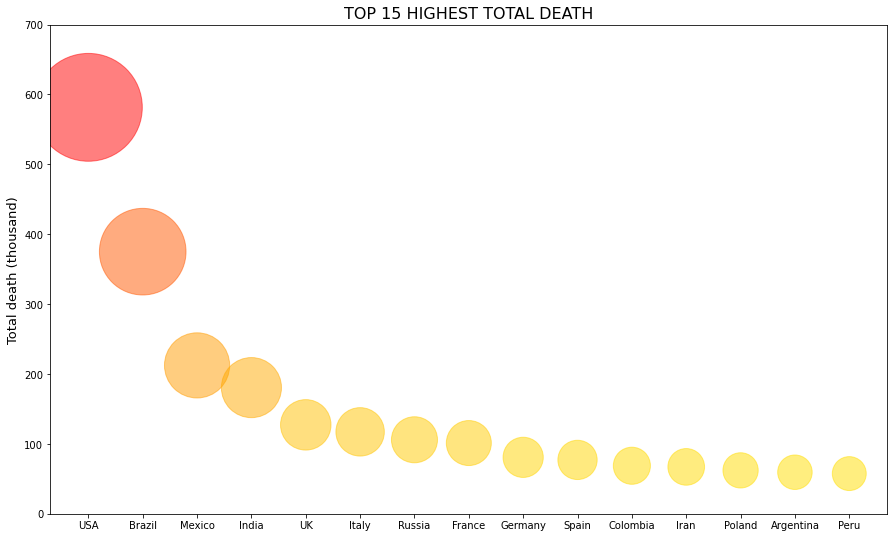

In [19]:
top15_deaths = data1[['Country','TotalDeaths']]
top15_deaths.sort_values(by = 'TotalDeaths', ascending = False,ignore_index=True, inplace = True)
top15_deaths = top15_deaths.head(15)

names = top15_deaths['Country']
values = top15_deaths['TotalDeaths']

color = []
s = 0
for i in range(len(names)-1):
        color.append((1,s/600000,0))
        s += (values[i] - values[i+1])
color.append((1,s/600000,0))
plt.figure(figsize=(15, 9))
plt.ylim([0,700])
plt.scatter( x = names, y = values/1000,
             s = values/50, c = color, alpha=0.5)
plt.ylabel('Total death (thousand)',fontsize = '13')
plt.title('TOP 15 HIGHEST TOTAL DEATH',fontsize = '16')
plt.show()

<BarContainer object of 15 artists>

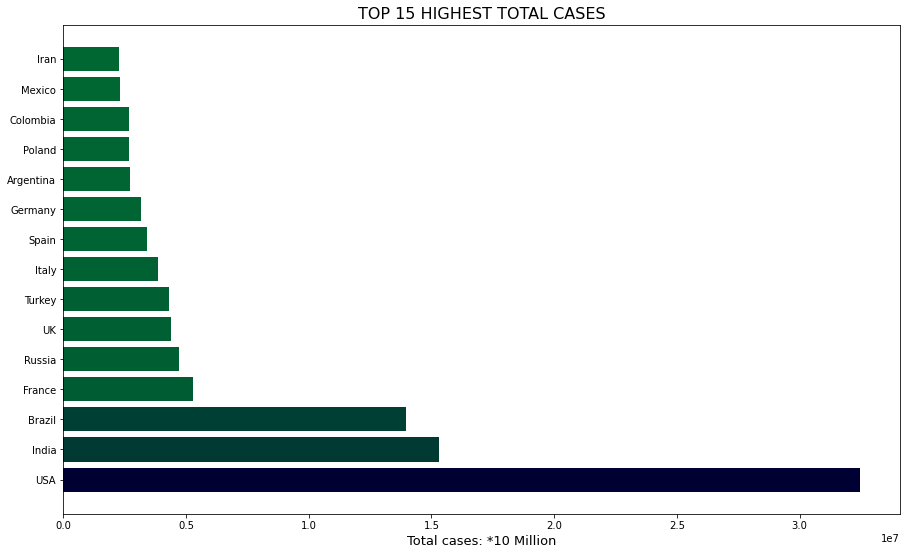

In [20]:
top15_case = data[['Country','Total Cases']]

top15_case = top15_case.head(15)

names = top15_case['Country']
values = top15_case['Total Cases']

c = []
s = 0
for i in range(len(names)-1):
        c.append((0,s/75_000_000,0.2))
        s += (values[i] - values[i+1])
c.append((0,s/75_000_000,0.2))

c
plt.figure(figsize=(15, 9))

plt.title('TOP 15 HIGHEST TOTAL CASES',fontsize = '16')
plt.xlabel('Total cases: *10 Million',fontsize = '13')

plt.barh(names, values,color = c)

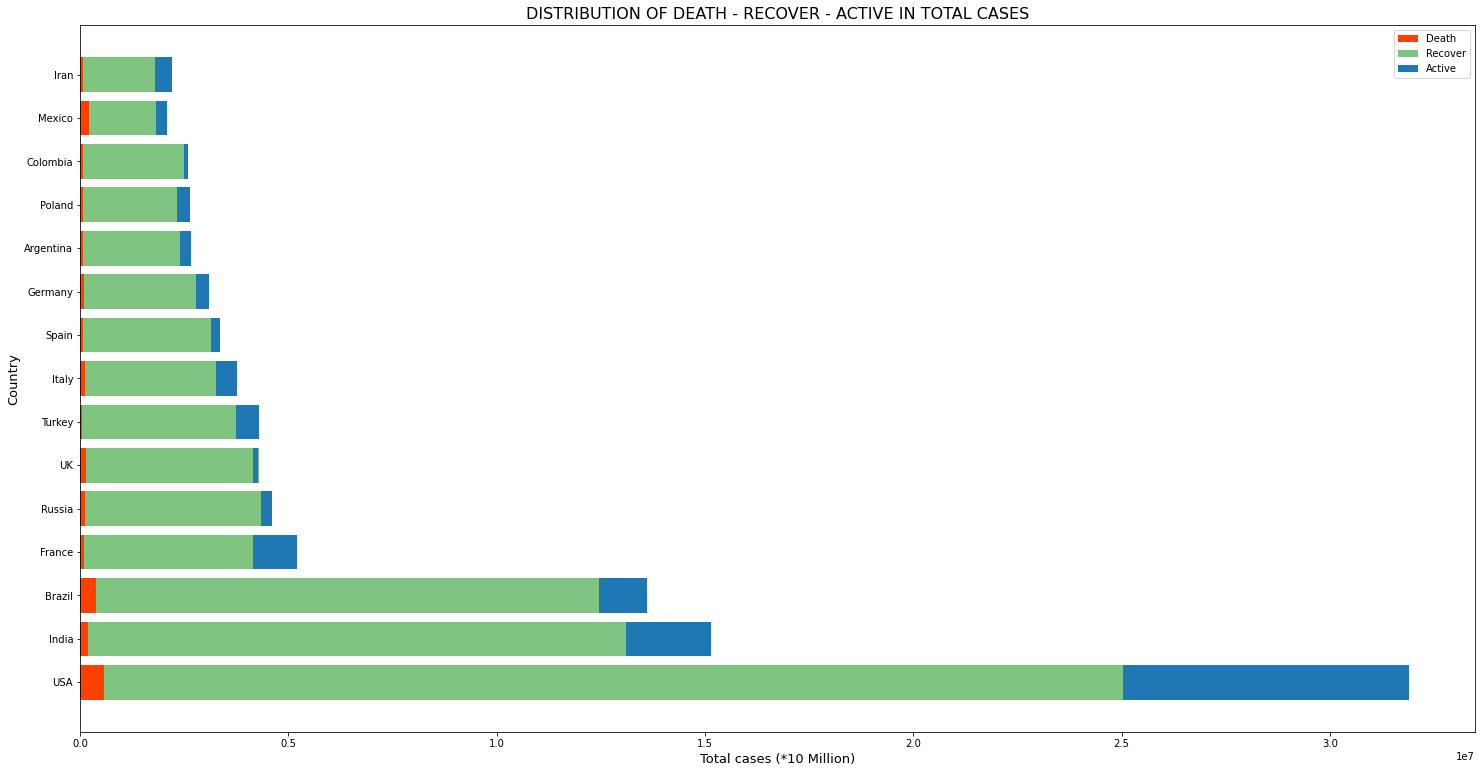

In [21]:
top15_distribute = data[['Country','TotalDeaths','TotalRecovered','ActiveCases']].head(15)


labels = top15_distribute['Country']
death = top15_distribute['TotalDeaths']
recover = top15_distribute['TotalRecovered']
active = top15_distribute['ActiveCases']

       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(25,13))

ax.barh(labels, death , label='Death',color = (1,0.25,0))
ax.barh(labels, recover, left = death,label='Recover',color = (0,0.55,0),alpha = 0.5)
ax.barh(labels, active,  left = recover,label='Active')

ax.set_ylabel('Country',fontsize = '13')
ax.set_xlabel('Total cases (*10 Million)',fontsize = '13')
ax.set_title('DISTRIBUTION OF DEATH - RECOVER - ACTIVE IN TOTAL CASES',fontsize = '16')
ax.legend()

plt.show()

In [12]:
top15_active_cases = data[['Country','ActiveCases','NewDeaths']].sort_values(by = 'ActiveCases', ascending = False,ignore_index=True)
top15_active_cases = top15_active_cases.head(50)
top15_active_cases



,Country,ActiveCases,NewDeaths
0,USA,6851117,498
1,India,2030944,1757
2,Brazil,1141952,1607
3,France,1044311,489
4,Turkey,550792,341
5,Italy,493484,316
6,Ukraine,425339,214
7,Iran,396986,398
8,Poland,298214,101
9,Germany,296473,183


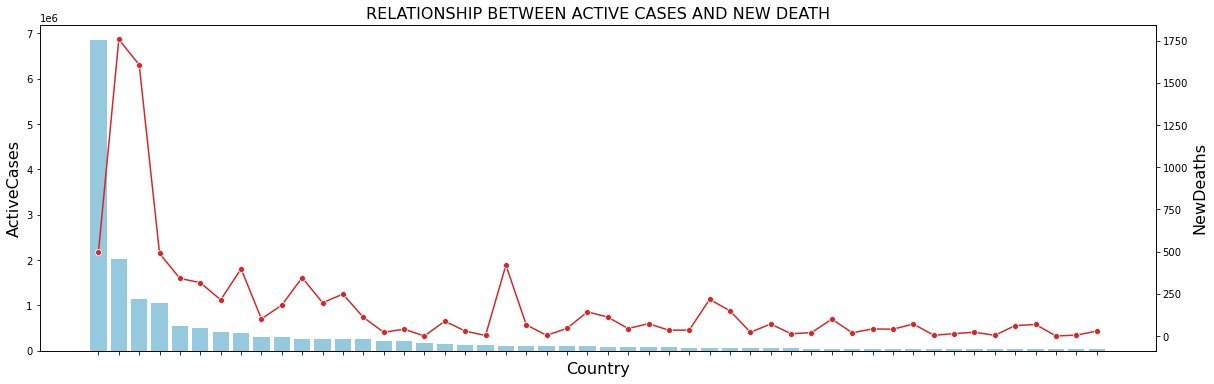

In [13]:
country = top15_active_cases['Country']
active_case = top15_active_cases['ActiveCases']
death = top15_active_cases['NewDeaths']

#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,6))
color = 'skyblue'
#bar plot creation
ax1.set_title('RELATIONSHIP BETWEEN ACTIVE CASES AND NEW DEATH', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('Active Cases', fontsize=16)
ax1 = sns.barplot(x='Country', y= 'ActiveCases', data = top15_active_cases, color = color)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('New Deaths', fontsize=16)
ax2 = sns.lineplot(x='Country', y= 'NewDeaths', data = top15_active_cases, sort=False, color=color,marker='o')

ax2.set_xticklabels([])
#show plot
plt.show()

In [14]:
continent_data_larger_1m = data[data['Population'] >= 1_000_000].groupby(by = 'Continent').sum()
continent_data_larger_1m

,Total Cases,New Cases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
Continent,,,,,,,,,,,,
Africa,4397764,8662,117679,230,3938670,341415,3693,219021,4956,42385396,2806076,1361573831
Asia,34176767,400000,470783,3295,29715994,3989990,29543,1056166,10770,725618766,23593494,4634166737
Australia/Oceania,42091,245,1027,2,29755,11309,0,2763,50,18431118,1039207,39820845
Europe,42737104,99244,975449,2816,37112507,4649148,32517,2277964,47864,702971474,32697565,745412268
North America,37415993,67041,846408,703,29124987,7444598,17056,370586,8001,478427799,3720980,589637548
South America,23452151,85454,625718,2850,21091122,1735311,24883,421181,10884,83920967,2478578,431915750


In [15]:
test_1M_percentage = (continent_data_larger_1m['Tests/1M pop']/sum(continent_data_larger_1m['Tests/1M pop'])*100).round(2)
test_1M_percentage                      

Continent
Africa                4.23
Asia                 35.57
Australia/Oceania     1.57
Europe               49.29
North America         5.61
South America         3.74
Name: Tests/1M pop, dtype: float64

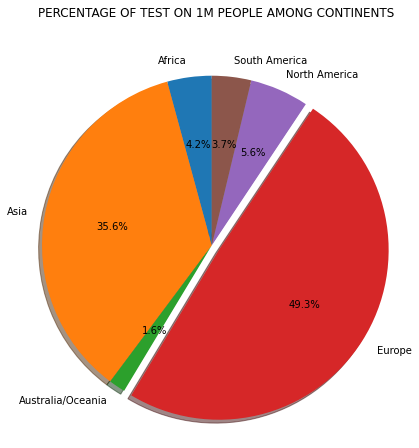

In [16]:
labels = list(test_1M_percentage.index)
sizes = list(test_1M_percentage)
explode = (0,0,0,0.05,0,0)
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',explode = explode,
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("PERCENTAGE OF TEST ON 1M PEOPLE AMONG CONTINENTS", y = 1.1)
plt.show()

In [17]:
continent_data = data.groupby(by = 'Continent').sum()
positive = (continent_data['Total Cases']/continent_data['Total Tests']*100).round(2)
negative = ((continent_data['Total Tests'] - continent_data['Total Cases']) / continent_data['Total Tests']*100).round(2)
negative_positive = pd.DataFrame({
                                  'Pos':positive,
                                  'Nega':negative})
continent_data

,Total Cases,New Cases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
Continent,,,,,,,,,,,,
Africa,4478163,8927,118501,234,3996320,363342,3776,422743,6750,42971859,4185245,1366127240
Asia,34204503,400161,470857,3295,29740820,3992826,29611,1106331,10906,727097321,25980954,4636590526
Australia/Oceania,61466,260,1175,2,34790,25501,4,109228,1003,18545555,2283559,42691595
Europe,42967972,99538,978619,2827,37332669,4656684,32666,3283840,62474,708579796,61874902,747993083
North America,37506600,67278,847593,708,29188674,7470333,17193,1092296,14854,479988831,23165738,592803946
South America,23491992,85708,626273,2852,21120280,1745439,24924,529850,11860,84287132,5382878,433604585


Text(0.5, 0.98, 'Continent-Wise Tested Positive & Negative Percentage Composition')

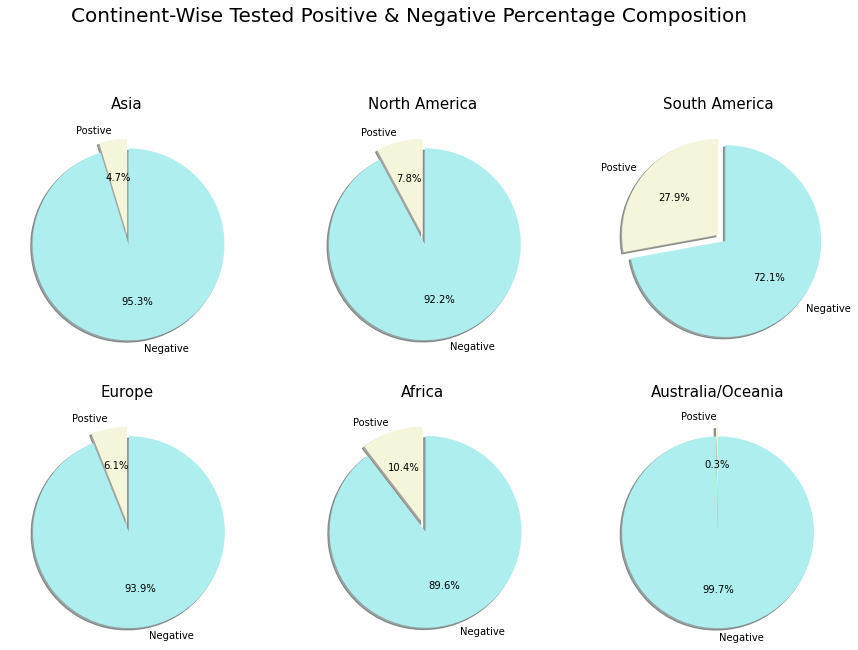

In [18]:
explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']

fig = plt.figure(figsize = (15,15))

plt.subplot(331)
plt.pie(negative_positive[negative_positive.index == 'Asia'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Asia', fontsize = 15)


plt.subplot(332)
plt.pie(negative_positive[negative_positive.index == 'North America'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('North America', fontsize = 15)

plt.subplot(333)
plt.pie(negative_positive[negative_positive.index == 'South America'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('South America', fontsize = 15)

plt.subplot(334)
plt.pie(negative_positive[negative_positive.index == 'Europe'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Europe', fontsize = 15)

plt.subplot(335)
plt.pie(negative_positive[negative_positive.index == 'Africa'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Africa', fontsize = 15)

plt.subplot(336)
plt.pie(negative_positive[negative_positive.index == 'Australia/Oceania'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Australia/Oceania', fontsize = 15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize = 20)

---
Mối quan hệ giữa số cases và số test: có thế có đường thằng tuyến tính